In [1]:
import cv2
from PIL import Image, ImageDraw
import random as rnd
import sys
# define acllite library path
sys.path.append('../../Common/acllite')
# modules of acllite library
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, postprocessing

In [2]:
# define device id & model path
device_id = 0
model_path = "model/yolov5s.om"

# define image & coco_names paths
img_path = "../../Common/data/dog.jpg"
coco_names_path = "../../Common/data/coco.names"

In [3]:
# load coco names
with open(coco_names_path) as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [4]:
# initialize acllite library
acl_resource = AclLiteResource()
acl_resource.init()

# load *.om model
model = AclLiteModel(model_path, device_id)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 4335000
Create model output dataset success
Init model resource success


In [5]:
# read image
img_org_bgr = cv2.imread(img_path)

In [6]:
# 1) pre-processing stage
data = preprocessing(img_org_bgr,model._model_desc)

input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 640, 640, 3]}, 0)
model input datatype 4
model output size 1
output  0
model output dims ({'name': 'Concat_404:0:output', 'dimCount': 3, 'dims': [1, 25500, 85]}, 0)
model output datatype 1
[PreProc] img_resized shape (640, 640, 3)


In [7]:
# 2) model execution(forward) stage
result_list = model.execute([data,]) 

In [8]:
# 3) post-processing the raw predictions
bboxes = postprocessing(result_list, img_org_bgr, model._model_desc)

In [9]:
# draw bounding boxes
img = Image.open(img_path)
img1 = ImageDraw.Draw(img)

for bbox in bboxes:
    label = coco_labels[int(bbox[5])]
    print(bbox[:4], bbox[4], bbox[5], label)

    color ="#FF"+''.join([rnd.choice('0123456789ABCDEF') for j in range(4)]) # random color for bounding boxes
    
    img1.rectangle(list(bbox[:4]), outline =color, width=3) # draw bounding boxes
    img1.rectangle((bbox[0], bbox[1], bbox[0] + len(label)*8, bbox[1] + 15), 
                outline = (255,255,255), width=10) # draw box for lable
    
    img1.text((bbox[0]+5, bbox[1]), label, (0,0,0), thickness=10)

[133.0, 226.0, 312.0, 542.0] 0.9135742 16 dog
[127.0, 128.0, 565.0, 425.0] 0.9135742 1 bicycle
[471.0, 75.0, 691.0, 171.0] 0.71728516 2 car


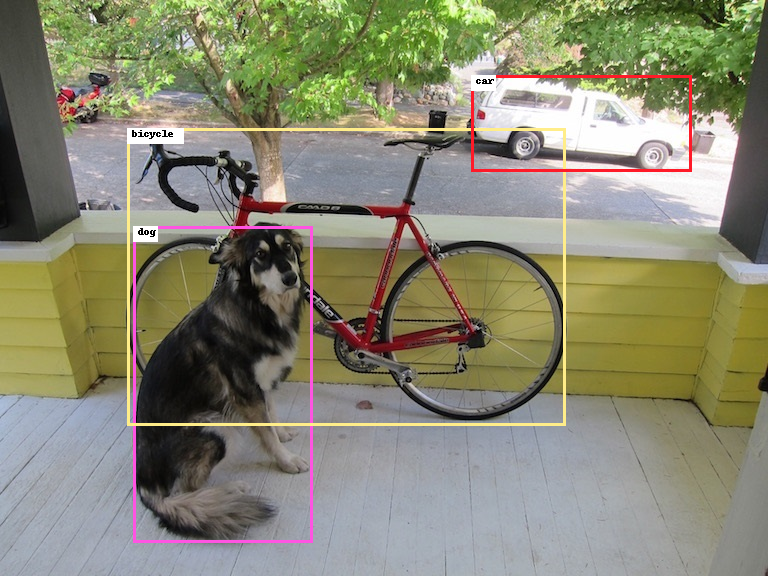

In [10]:
img